## **Sentiment Categorization with Different Models**

### **VADER Sentiment Labeling**

In [ ]:
!pip install pandas nltk vaderSentiment

In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
comments_df = pd.read_csv('/content/Preprocessed _all_comments_data.csv')

In [ ]:
comments_df['Comment'] = comments_df['Comment'].fillna('')


In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def analyze_sentiment(comment):
    # Get sentiment scores from VADER
    scores = analyzer.polarity_scores(comment)
    # Determine sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
comments_df['sentiment'] = comments_df['Comment'].apply(analyze_sentiment)


In [ ]:
comments_df.head()

,Comment,sentiment
0,"shut up pleas, dont argue with the $science, n...",Positive
1,"sea level rise is already baked in, water fron...",Neutral
2,"and remember, it's your fault,with your foggy ...",Neutral
3,i never heard so much bullshit in my life…a re...,Negative
4,now what?,Neutral


In [ ]:
from google.colab import files
output_file_path = '/content/sentiment_analysis_results.csv'
comments_df.to_csv(output_file_path, index=False)

# Download the resulting CSV file
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **TextBlob Sentiment Labeling**

In [ ]:
!pip install textblob


In [ ]:
import pandas as pd
from textblob import TextBlob


In [ ]:
# Load the data
data = pd.read_csv('/content/Preprocessed _all_comments_data.csv')

In [ ]:
data['Comment'] = data['Comment'].fillna('')

In [ ]:
# Define a function to classify comments based on polarity scores
def classify_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the dataset and create a new column 'sentiment'
data['Sentiment'] = data['Comment'].apply(classify_sentiment)

# Save the results as a CSV file
data.to_csv('sentiment_analysis_results1.csv', index=False)

print("Sentiment analysis results saved as sentiment_analysis_results1.csv")

Sentiment analysis results saved as sentiment_analysis_results1.csv


### **Pattern Sentiment Labeling**

In [ ]:
!pip install pattern

In [ ]:
# Load the data
data1 = pd.read_csv('/content/Preprocessed _all_comments_data.csv')

In [ ]:
import pandas as pd
from pattern.en import sentiment


In [ ]:
data1['Comment'] = data1['Comment'].fillna('')

In [ ]:
def classify_sentiment(text):
    polarity, subjectivity = sentiment(text)
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the dataset and create a new column 'sentiment'
data1['sentiment'] = data1['Comment'].apply(classify_sentiment)


In [ ]:
data1.head()

,Comment,sentiment
0,"shut up pleas, dont argue with the $science, n...",Neutral
1,"sea level rise is already baked in, water fron...",Neutral
2,"and remember, it's your fault,with your foggy ...",Negative
3,i never heard so much bullshit in my life…a re...,Negative
4,now what?,Neutral


In [ ]:
# Save the results as a CSV file
data1.to_csv('sentiment_analysis_results2.csv', index=False)

print("Sentiment analysis results saved as sentiment_analysis_results2.csv")

Sentiment analysis results saved as sentiment_analysis_results2.csv


## **Sentiment Visualization and Analysis**

### **Plot of Sentiment Label Distribution**

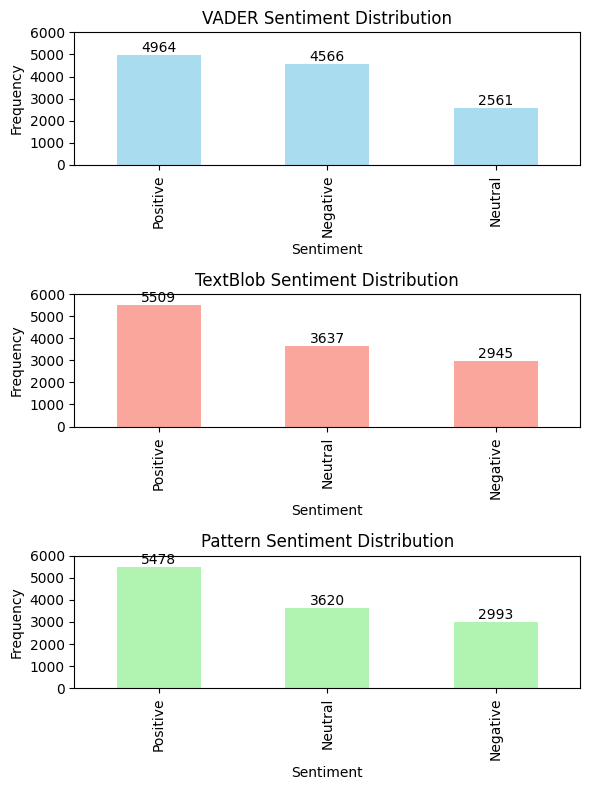

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
vader_results = pd.read_csv('sentiment_analysis_results.csv')
textblob_results = pd.read_csv('sentiment_analysis_results1.csv')
pattern_results = pd.read_csv('sentiment_analysis_results2.csv')

# Plot the distribution of sentiment labels
plt.figure(figsize=(6, 8))  # Reduce figure size to fit all plots

# Function to add labels on top of bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.0f}',  # Display value as an integer
            (p.get_x() + p.get_width() / 2, p.get_height()),  # Position label at the top of the bar
            ha='center',  # Center the label horizontally
            va='bottom'   # Position label above the bar
        )

# Plot VADER sentiment distribution
plt.subplot(3, 1, 1)
vader_counts = vader_results['sentiment'].value_counts()
ax1 = vader_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.ylim(0, 6000)  # Set y-axis range from 0 to 6000
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
add_value_labels(ax1)

# Plot TextBlob sentiment distribution
plt.subplot(3, 1, 2)
textblob_counts = textblob_results['Sentiment'].value_counts()
ax2 = textblob_counts.plot(kind='bar', color='salmon', alpha=0.7)
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.ylim(0, 6000)  # Set y-axis range from 0 to 6000
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
add_value_labels(ax2)

# Plot Pattern sentiment distribution
plt.subplot(3, 1, 3)
pattern_counts = pattern_results['sentiment'].value_counts()
ax3 = pattern_counts.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Pattern Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.ylim(0, 6000)  # Set y-axis range from 0 to 6000
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
add_value_labels(ax3)

plt.tight_layout()  # Adjusts the subplots to prevent overlap
plt.show()


### **Identification of Conflicting Sentiment Labels**

In [ ]:
import pandas as pd

# Load sentiment analysis results from CSV files into DataFrames
vader_results = pd.read_csv('sentiment_analysis_results.csv')
textblob_results = pd.read_csv('sentiment_analysis_results1.csv')
pattern_results = pd.read_csv('sentiment_analysis_results2.csv')

# Identify comments with conflicting sentiment labels between VADER and TextBlob, VADER and Pattern, TextBlob and Pattern
conflicting_comments = []

# Iterate through each row and check for conflicting sentiment labels
for index in range(len(vader_results)):
    # Get sentiments from each method
    vader_sentiment = vader_results.iloc[index]['sentiment']
    textblob_sentiment = textblob_results.iloc[index]['Sentiment']
    pattern_sentiment = pattern_results.iloc[index]['sentiment']

    # Check if there is a conflict between the methods
    if (vader_sentiment != textblob_sentiment) or (vader_sentiment != pattern_sentiment) or (textblob_sentiment != pattern_sentiment):
        # If there's a conflict, store the comment and sentiments
        conflicting_comments.append({
            'Comment': vader_results.iloc[index]['Comment'],
            'VADER Sentiment': vader_sentiment,
            'TextBlob Sentiment': textblob_sentiment,
            'Pattern Sentiment': pattern_sentiment
        })

# Display conflicting comments
print("Conflicting Comments:")
for conflict in conflicting_comments:
    print(f"Comment: {conflict['Comment']}")
    print(f"VADER Sentiment: {conflict['VADER Sentiment']}")
    print(f"TextBlob Sentiment: {conflict['TextBlob Sentiment']}")
    print(f"Pattern Sentiment: {conflict['Pattern Sentiment']}")
    print("-----------------------------------------")


Streaming output truncated to the last 5000 lines.
Comment: are there enough raw material for renewables?
VADER Sentiment: Neutral
TextBlob Sentiment: Negative
Pattern Sentiment: Negative
-----------------------------------------
Comment: just stop flying man struggling light skin tone . use zoom or take a train.
VADER Sentiment: Negative
TextBlob Sentiment: Positive
Pattern Sentiment: Positive
-----------------------------------------
Comment: we do not have the time with renewables after 20yrs of wind & solar energy failure. climate change and co2 can be reduced quickly with new nuclear, but the old extremist/populist anti-nuclear group are the problem to solving climate change and the green party do not have the solutions. many green party build new fossil fuel gas/coal because renewables requires two energy system due to their low output and reliability. but this dual renewable energy system (wind/solar with gas/coal in via the backdoor) is never properly counted from a cost perspe

In [ ]:
import pandas as pd

# Load sentiment analysis results from CSV files into DataFrames
vader_results = pd.read_csv('sentiment_analysis_results.csv')
textblob_results = pd.read_csv('sentiment_analysis_results1.csv')
pattern_results = pd.read_csv('sentiment_analysis_results2.csv')

# Combine the sentiment labels from each method into a DataFrame
combined_results = vader_results[['Comment']]
combined_results['VADER Sentiment'] = vader_results['sentiment']
combined_results['TextBlob Sentiment'] = textblob_results['Sentiment']
combined_results['Pattern Sentiment'] = pattern_results['sentiment']

# Identify comments with conflicting sentiment labels between any pair of methods
conflicting_comments = combined_results[
    (combined_results['VADER Sentiment'] != combined_results['TextBlob Sentiment']) |
    (combined_results['VADER Sentiment'] != combined_results['Pattern Sentiment']) |
    (combined_results['TextBlob Sentiment'] != combined_results['Pattern Sentiment'])
]

# Save conflicting comments to a new CSV file
conflicting_comments.to_csv('conflicting_comments.csv', index=False)

print("Conflicting comments saved to conflicting_comments.csv")


Conflicting comments saved to conflicting_comments.csv


### **Word Cloud Visualizations of Sentiment Categories**

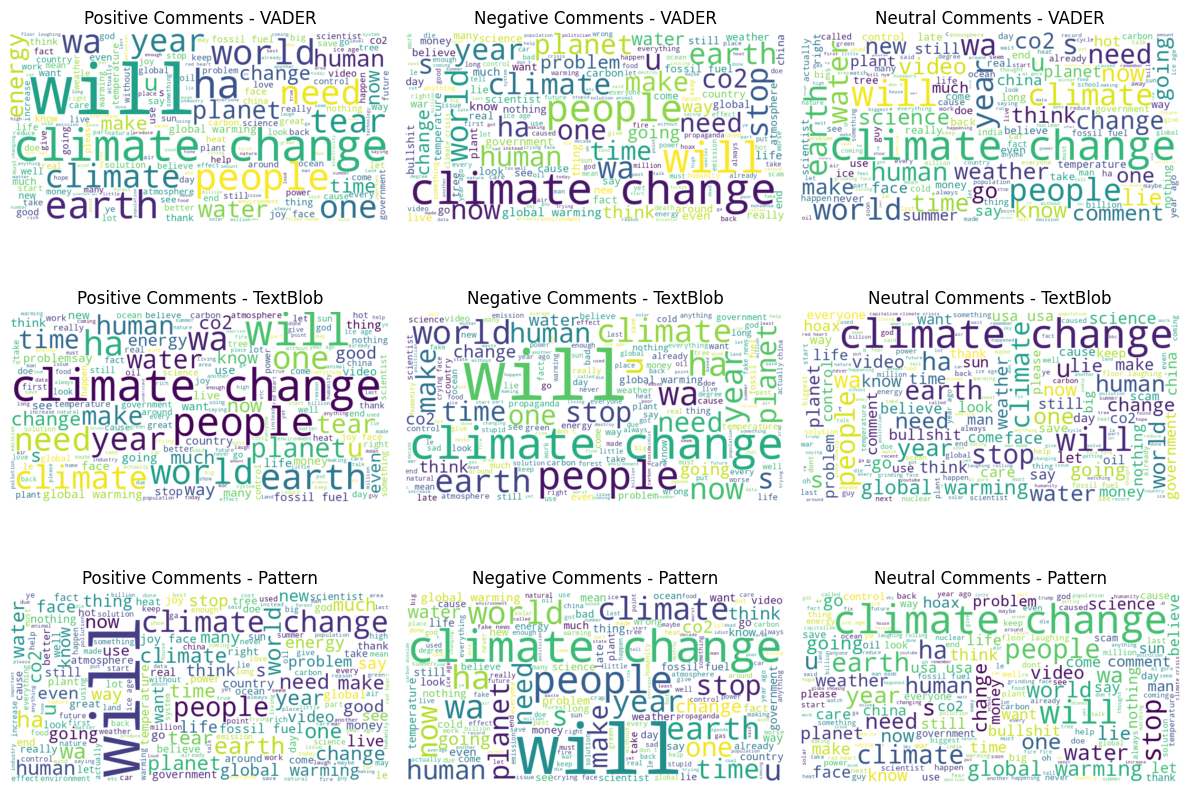

In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Load sentiment analysis results from CSV files into DataFrames
vader_results = pd.read_csv('sentiment_analysis_results.csv')
textblob_results = pd.read_csv('sentiment_analysis_results1.csv')
pattern_results = pd.read_csv('sentiment_analysis_results2.csv')

# Filter comments based on sentiment labels for VADER
positive_vader_comments = vader_results[vader_results['sentiment'] == 'Positive']['Comment'].dropna().str.cat(sep=' ')
negative_vader_comments = vader_results[vader_results['sentiment'] == 'Negative']['Comment'].dropna().str.cat(sep=' ')
neutral_vader_comments = vader_results[vader_results['sentiment'] == 'Neutral']['Comment'].dropna().str.cat(sep=' ')

# Filter comments based on sentiment labels for TextBlob
positive_textblob_comments = textblob_results[textblob_results['Sentiment'] == 'Positive']['Comment'].dropna().str.cat(sep=' ')
negative_textblob_comments = textblob_results[textblob_results['Sentiment'] == 'Negative']['Comment'].dropna().str.cat(sep=' ')
neutral_textblob_comments = textblob_results[textblob_results['Sentiment'] == 'Neutral']['Comment'].dropna().str.cat(sep=' ')

# Filter comments based on sentiment labels for Pattern
positive_pattern_comments = pattern_results[pattern_results['sentiment'] == 'Positive']['Comment'].dropna().str.cat(sep=' ')
negative_pattern_comments = pattern_results[pattern_results['sentiment'] == 'Negative']['Comment'].dropna().str.cat(sep=' ')
neutral_pattern_comments = pattern_results[pattern_results['sentiment'] == 'Neutral']['Comment'].dropna().str.cat(sep=' ')

# Generate word clouds for VADER results
wordcloud_positive_vader = WordCloud(width=800, height=400, background_color='white').generate(positive_vader_comments)
wordcloud_negative_vader = WordCloud(width=800, height=400, background_color='white').generate(negative_vader_comments)
wordcloud_neutral_vader = WordCloud(width=800, height=400, background_color='white').generate(neutral_vader_comments)

# Generate word clouds for TextBlob results
wordcloud_positive_textblob = WordCloud(width=800, height=400, background_color='white').generate(positive_textblob_comments)
wordcloud_negative_textblob = WordCloud(width=800, height=400, background_color='white').generate(negative_textblob_comments)
wordcloud_neutral_textblob = WordCloud(width=800, height=400, background_color='white').generate(neutral_textblob_comments)

# Generate word clouds for Pattern results
wordcloud_positive_pattern = WordCloud(width=800, height=400, background_color='white').generate(positive_pattern_comments)
wordcloud_negative_pattern = WordCloud(width=800, height=400, background_color='white').generate(negative_pattern_comments)
wordcloud_neutral_pattern = WordCloud(width=800, height=400, background_color='white').generate(neutral_pattern_comments)

# Plot word clouds for VADER, TextBlob, and Pattern
plt.figure(figsize=(12, 9))  # Reduce figure size to fit all plots in a single frame

# Plot VADER word clouds
plt.subplot(3, 3, 1)
plt.imshow(wordcloud_positive_vader, interpolation='bilinear')
plt.title('Positive Comments - VADER')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(wordcloud_negative_vader, interpolation='bilinear')
plt.title('Negative Comments - VADER')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(wordcloud_neutral_vader, interpolation='bilinear')
plt.title('Neutral Comments - VADER')
plt.axis('off')

# Plot TextBlob word clouds
plt.subplot(3, 3, 4)
plt.imshow(wordcloud_positive_textblob, interpolation='bilinear')
plt.title('Positive Comments - TextBlob')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(wordcloud_negative_textblob, interpolation='bilinear')
plt.title('Negative Comments - TextBlob')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(wordcloud_neutral_textblob, interpolation='bilinear')
plt.title('Neutral Comments - TextBlob')
plt.axis('off')

# Plot Pattern word clouds
plt.subplot(3, 3, 7)
plt.imshow(wordcloud_positive_pattern, interpolation='bilinear')
plt.title('Positive Comments - Pattern')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(wordcloud_negative_pattern, interpolation='bilinear')
plt.title('Negative Comments - Pattern')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(wordcloud_neutral_pattern, interpolation='bilinear')
plt.title('Neutral Comments - Pattern')
plt.axis('off')

plt.tight_layout()  # Adjust the subplots to prevent overlap
plt.show()


### **Sentiment Correlation Analysis**

Correlation Matrix:
             VADER  TextBlob   Pattern
VADER     1.000000  0.334421  0.332634
TextBlob  0.334421  1.000000  0.987246
Pattern   0.332634  0.987246  1.000000


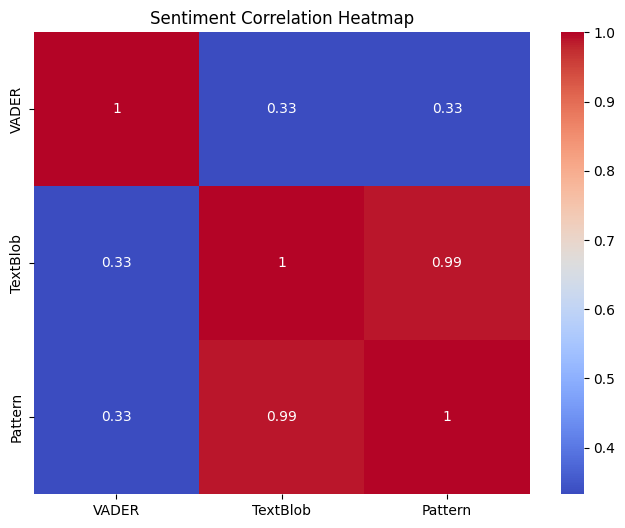

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sentiment analysis results from CSV files into DataFrames
vader_results = pd.read_csv('sentiment_analysis_results.csv')
textblob_results = pd.read_csv('sentiment_analysis_results1.csv')
pattern_results = pd.read_csv('sentiment_analysis_results2.csv')

# Map sentiment labels to numerical scores
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
vader_results['sentiment_score'] = vader_results['sentiment'].map(sentiment_mapping)
textblob_results['sentiment_score'] = textblob_results['Sentiment'].map(sentiment_mapping)
pattern_results['sentiment_score'] = pattern_results['sentiment'].map(sentiment_mapping)

# Merge DataFrames on a common column (e.g., index or another column)
merged_results = pd.concat([vader_results['sentiment_score'], textblob_results['sentiment_score'], pattern_results['sentiment_score']], axis=1)
merged_results.columns = ['VADER', 'TextBlob', 'Pattern']

# Calculate correlation matrix
correlation_matrix = merged_results.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Sentiment Correlation Heatmap')
plt.show()


### **Heatmaps of Sentiment Analysis Results**

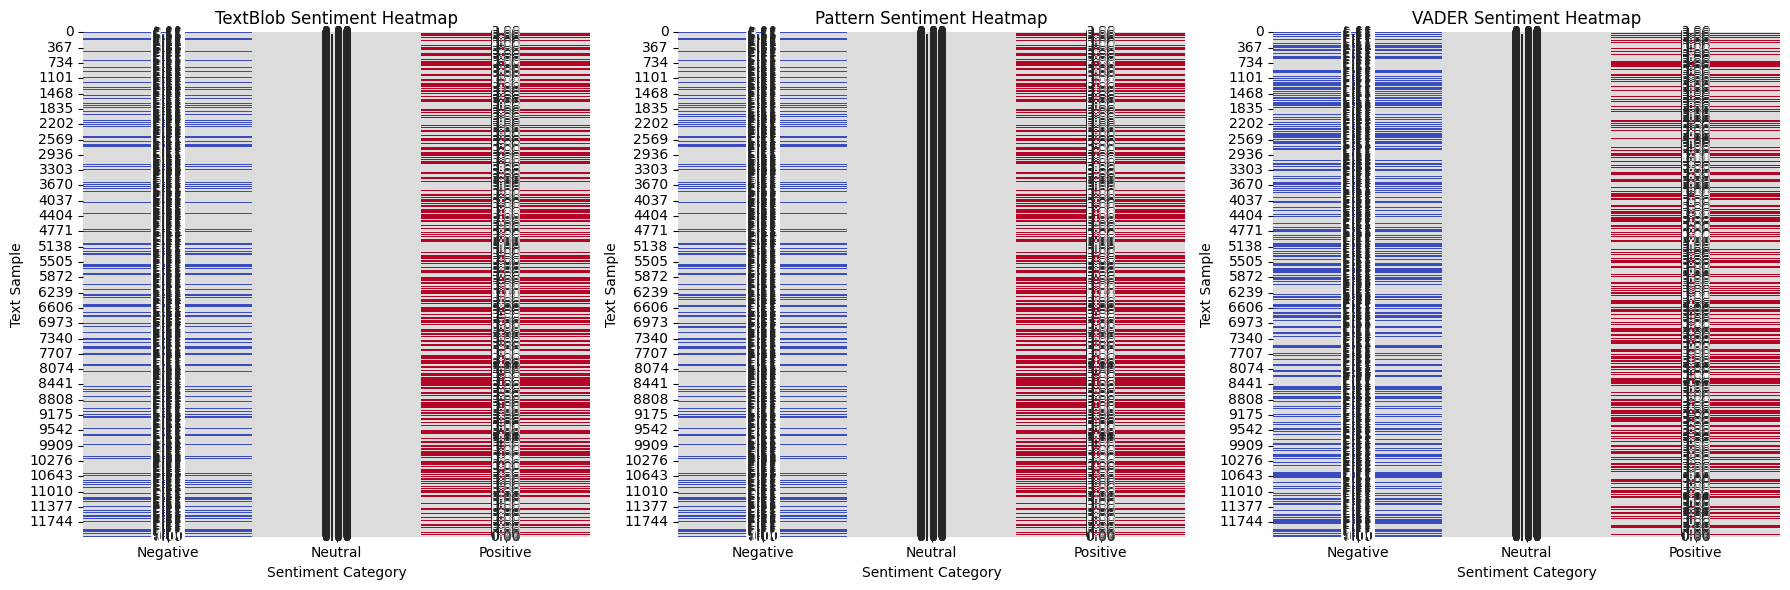

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load TextBlob, Pattern, and VADER sentiment analysis results from CSV files into DataFrames
textblob_results = pd.read_csv('sentiment_analysis_results1.csv')
pattern_results = pd.read_csv('sentiment_analysis_results2.csv')
vader_results = pd.read_csv('sentiment_analysis_results.csv')

# Map TextBlob sentiment labels to numerical scores
sentiment_mapping_textblob = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
textblob_results['sentiment_score'] = textblob_results['Sentiment'].map(sentiment_mapping_textblob)

# Map Pattern sentiment labels to numerical scores
sentiment_mapping_pattern = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
pattern_results['sentiment_score'] = pattern_results['sentiment'].map(sentiment_mapping_pattern)

# Map VADER sentiment labels to numerical scores
sentiment_mapping_vader = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
vader_results['sentiment_score'] = vader_results['sentiment'].map(sentiment_mapping_vader)

# Create pivot tables for TextBlob, Pattern, and VADER results
textblob_pivot = textblob_results.pivot_table(index=textblob_results.index, columns='Sentiment', values='sentiment_score', fill_value=0)
pattern_pivot = pattern_results.pivot_table(index=pattern_results.index, columns='sentiment', values='sentiment_score', fill_value=0)
vader_pivot = vader_results.pivot_table(index=vader_results.index, columns='sentiment', values='sentiment_score', fill_value=0)

# Create a figure for the heatmaps
plt.figure(figsize=(18, 6))

# Plot TextBlob heatmap
if not textblob_pivot.empty:
    plt.subplot(1, 3, 1)
    sns.heatmap(textblob_pivot, cmap="coolwarm", annot=True, fmt=".2f", cbar=False)
    plt.title('TextBlob Sentiment Heatmap')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Text Sample')

# Plot Pattern heatmap
if not pattern_pivot.empty:
    plt.subplot(1, 3, 2)
    sns.heatmap(pattern_pivot, cmap="coolwarm", annot=True, fmt=".2f", cbar=False)
    plt.title('Pattern Sentiment Heatmap')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Text Sample')

# Plot VADER heatmap
if not vader_pivot.empty:
    plt.subplot(1, 3, 3)
    sns.heatmap(vader_pivot, cmap="coolwarm", annot=True, fmt=".2f", cbar=False)
    plt.title('VADER Sentiment Heatmap')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Text Sample')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### **Visualizing Word Embeddings with t-SNE**

In [35]:
import gensim.downloader as api

# Load the pre-trained word embedding model (e.g., Word2Vec)
model = api.load("word2vec-google-news-300")

# Get the vocabulary (words) in the model
vocabulary = model.index_to_key

# Get the word embedding vector for a specific word
word = "example"
embedding_vector = model[word]

# Print the size of the vocabulary and the dimensionality of the word embeddings
print("Vocabulary size:", len(vocabulary))
print("Dimensionality of word embeddings:", len(embedding_vector))


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary size: 3000000
Dimensionality of word embeddings: 300


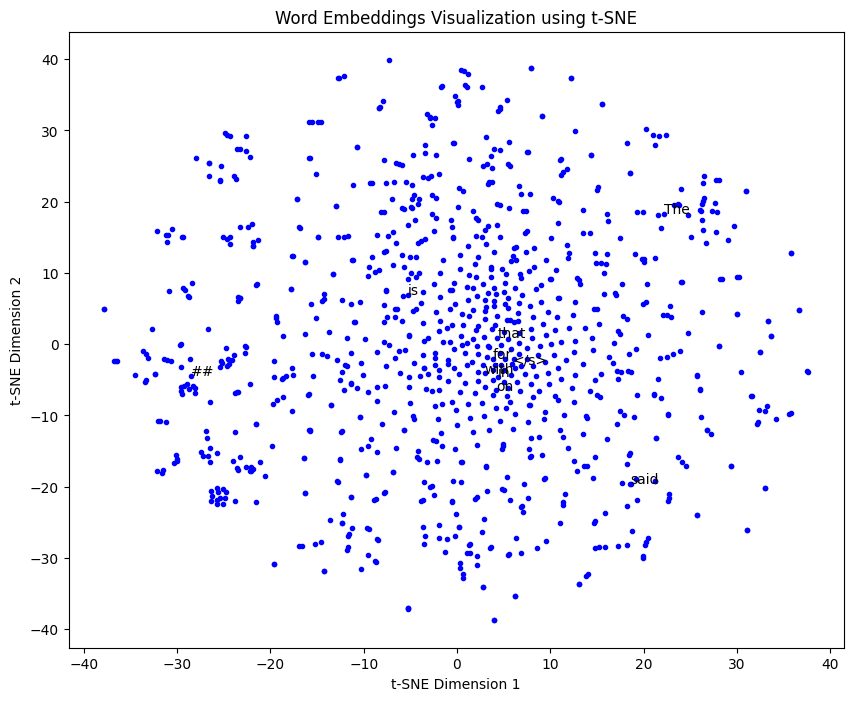

In [36]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader as api

# Load the pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

# Extract a subset of word embeddings and corresponding words
subset_size = 1000
words = model.index_to_key[:subset_size]
embeddings = np.array([model[word] for word in words])

# Apply t-SNE to reduce the dimensionality of word embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot word embeddings in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='.', color='b')

# Add annotations for a subset of words
num_words_to_annotate = 10
for i in range(num_words_to_annotate):
    plt.annotate(words[i], (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('Word Embeddings Visualization using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
